In [10]:
import os, pickle
import numpy as np
# building the dataset
DATASET = {'mice':[],
           'days':[],
           'folders':[]}

data_folder = os.path.join(os.path.expanduser('~'), 'DATA', 'Marcel_Data')
days = [d for d in os.listdir(data_folder) if (('._' not in d) and ('.DS' not in d))]
for day in days:
    mice = [f for f in os.listdir(os.path.join(data_folder, day)) if '.DS' not in f]
    for m in mice:
        folders = [f for f in os.listdir(os.path.join(data_folder, day, m)) if '.DS' not in f]
        for f in folders:
            DATASET['mice'].append(m)
            DATASET['days'].append(day)
            DATASET['folders'].append(os.path.join(data_folder, day, m, f))

In [11]:
# getting one datafile
desired_data = 'TSeries-01192022-1602-001'
for i, f in enumerate(DATASET['folders']):
    if desired_data in f:
        folder = DATASET['folders'][i]

In [12]:
import pickle
with open(os.path.join(folder, 'Analysis_Data.pickle'), 'rb') as f:
    data = pickle.load(f)

(0.0, 8827.0, -5.35, 2.35)

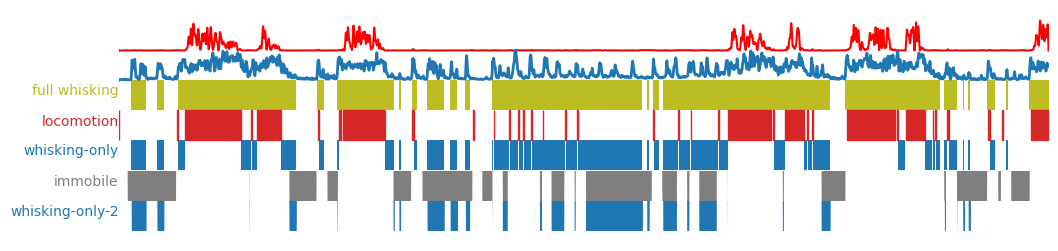

In [32]:
import matplotlib.pylab as plt

running = data['Locomotion_data']['bool_binary_movement']
whisking = data['Whisking_data']['binary_whisking']
run_whisk = running & whisking
run_only  = running & (~whisking)
whisk_only = whisking & (~running)


whisking_trace = data['Whisking_data']['normalized_trace']
speed_trace = data['Locomotion_data']['speed']



time = np.linspace(0, data['Settings']['time_seconds'], len(whisking_trace))

fig, ax = plt.subplots(1, figsize=(12,3))
#w = data['Whisking_data']['binary_whisking']
ax.plot(data['Locomotion_data']['speed']/data['Locomotion_data']['speed'].max()+1., 'r')
ax.plot(whisking_trace, lw=2)

#ax.fill_between(range(len(w)), 0*w, -w, color='tab:olive', lw=0)
#wo = data['Locomotion_data']['loc']

for i in data['Whisking_data']['location_bouts']:
    ax.fill_between(x=[i[0], i[1]-1], y1=0, y2=-1, color='tab:olive', lw=0)
ax.fill_between(x=[i[0], i[1]-1], y1=0, y2=-1, color='tab:olive', lw=0)
ax.annotate('full whisking', (0, -0.5), xycoords='data', ha='right', color='tab:olive')


for i in data['Whisking_data']['whisking only']['bout_location']:
    ax.fill_between(x=[i[0], i[1]-1], y1=-2, y2=-3, color='tab:blue', lw=0)
ax.annotate('whisking-only', (0, -2.5), xycoords='data', ha='right', color='tab:blue')

for i in data['Locomotion_data']['events']['location']:
    ax.fill_between(x=[i[0], i[1]-1], y1=-1, y2=-2, color='tab:red')
ax.annotate('locomotion', (0, -1.5), xycoords='data', ha='right', color='tab:red')

#ax.fill_between(range(len(wo)), 0*wo, -wo, color='blue', lw=0)
Immobile = np.array([not i for i in np.array(data['Locomotion_data']['extended_binary_movement']).astype(bool)])
ax.fill_between(range(len(Immobile)), -3+0.*Immobile, -3-Immobile, color='tab:grey', lw=0)
ax.annotate('immobile', (0, -3.5), xycoords='data', ha='right', color='tab:grey')

W2 = data['Whisking_data']['binary_whisking'].astype(bool) & Immobile
ax.fill_between(range(len(W2)), -4+0.*W2, -4-W2, color='tab:blue', lw=0)
ax.annotate('whisking-only-2', (0, -4.5), xycoords='data', ha='right', color='tab:blue')

ax.set_xlim([0, len(data['Locomotion_data']['speed'])])
ax.axis('off')